In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.stem import PorterStemmer

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize


In [107]:
df=pd.read_csv('/Users/sourabhpandey/Desktop/pro/pro/updated_data.csv')

In [108]:
df

,review_date,review_rating,review_title,review_text,verified_purchase
0,2019-01-01,5,Dove Men’s + Deodorant,"As you get older, you know what you like and w...",True
1,2019-01-02,5,Great for a marmite lover!,Three gigantic marmite jars that will last pro...,True
2,2019-01-02,4,Vitamin B12.,Excellent,True
3,2019-01-02,5,A Very Handy Flavour Top - Up to Keep In The C...,A great flavour top - up for slow cooking.,True
4,2019-01-02,5,Very handy,Does what is says it does,False
...,...,...,...,...,...
2496,2019-04-27,5,perfect,"These are amazing, just like the original Corn...",False
2497,2019-05-02,5,delicious,Our whole family loves bovril and we use it da...,False
2498,2019-05-05,1,This review is for the squeezy bottle,Contents of this bottle is lovely. HOWEVER try...,False
2499,2019-05-17,4,very nice,These taste great and you cannot Cant tell the...,False


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501 entries, 0 to 2500
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   review_date        2501 non-null   object
 1   review_rating      2501 non-null   int64 
 2   review_title       2396 non-null   object
 3   review_text        2501 non-null   object
 4   verified_purchase  2501 non-null   bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 80.7+ KB


## NULL Values

In [110]:
df.isnull().sum()

review_date            0
review_rating          0
review_title         105
review_text            0
verified_purchase      0
dtype: int64

In [111]:
df.drop(['review_title'],axis=1)
# drop the null columns

,review_date,review_rating,review_text,verified_purchase
0,2019-01-01,5,"As you get older, you know what you like and w...",True
1,2019-01-02,5,Three gigantic marmite jars that will last pro...,True
2,2019-01-02,4,Excellent,True
3,2019-01-02,5,A great flavour top - up for slow cooking.,True
4,2019-01-02,5,Does what is says it does,False
...,...,...,...,...
2496,2019-04-27,5,"These are amazing, just like the original Corn...",False
2497,2019-05-02,5,Our whole family loves bovril and we use it da...,False
2498,2019-05-05,1,Contents of this bottle is lovely. HOWEVER try...,False
2499,2019-05-17,4,These taste great and you cannot Cant tell the...,False


In [112]:
#CHECK TOTAL DUPLICATE OCCURENCES
dup = df.duplicated().sum()
print("Number of duplicates in dataset: ", dup)

Number of duplicates in dataset:  783


In [113]:
df = df.drop_duplicates().reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   review_date        1718 non-null   object
 1   review_rating      1718 non-null   int64 
 2   review_title       1650 non-null   object
 3   review_text        1718 non-null   object
 4   verified_purchase  1718 non-null   bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 55.5+ KB


# EDA ON THE REVIEW 

We have conducted an in-depth review surrounding the background of the Amazon dataset, and this time the review_text itself is going to be taken a further look. To aid in our pre-processing, certain columns will be added to understand certain instances the sentences have. Those include the counts of:

1.Word
2.Characters (with spaces)
3.Stopwords
4.Punctuations
5.Uppercase characters

In [114]:
df.head(1)

,review_date,review_rating,review_title,review_text,verified_purchase
0,2019-01-01,5,Dove Men’s + Deodorant,"As you get older, you know what you like and w...",True


#### A lambda function in Python is a small, anonymous function defined using the lambda keyword. Unlike regular functions defined using def, lambda functions are limited to a single expression. They are often used for short, throwaway functions where defining a full function would be cumbersome.

#### --->lambda arguments: expression
##### 1.lambda is the keyword used to define a lambda function.
##### 2.arguments are the inputs to the function, similar to parameters in a regular function.
##### 3.expression is the single expression that the lambda function will evaluate and return.

In [160]:
#WORD COUNT
df['total_words'] = df['review_text'].apply(lambda i: len(str(i).split(" ")))

#str(i): Converts the review text to a string.
#.split(" "): Splits the string into words based on spaces.
#len(...): Counts the number of words.

In [116]:
#CHARACTER COUNT
df['total_character']=df['review_text'].str.len() #space included

#str.len(): Returns the length of the string, including spaces and punctuation.

In [126]:
sw = '/Users/sourabhpandey/Desktop/pro/stopwords.txt'

# with open(sw, 'r') as file:
#     # Step 2: Read stopwords as a list (assuming one stopword per line)
#     stopwords = [line.strip() for line in file]

df['total_stopwords'] = df['review_text'].str.split().apply(lambda words: len(set(words) & set(sw)))

In [161]:
#PUNCTUATION AND SPECIAL CHARA COUNT
count_p = lambda p1,p2: sum([1 for i in p1 if i in p2])
df['total_punctuations'] = df.review_text.apply(lambda p: count_p(p, string.punctuation))


# string.punctuation: Contains all punctuation marks.
# count_p = lambda p1, p2: sum([1 for i in p1 if i in p2]): Defines a lambda function to count characters in p1 that are also in p2.
# df['review_text'].apply(lambda p: count_p(p, string.punctuation)): Applies the function to each review to count punctuation marks.

In [162]:
df['total_uppercases'] = df['review_text'].str.findall(r'[A-Z]').str.len()


# str.findall(r'[A-Z]'): Finds all uppercase characters using a regular expression.
# str.len(): Counts the number of uppercase characters.

In [165]:
df.head()

,review_date,review_rating,review_title,review_text,verified_purchase,total words,total_character,total_stopwords,total punctuations,total_uppercases,review_length,total_words,total_punctuations
0,2019-01-01,5,Dove Men’s + Deodorant,"As you get older, you know what you like and w...",True,39,202,0,7,5,202,39,7
1,2019-01-02,5,Great for a marmite lover!,Three gigantic marmite jars that will last pro...,True,30,175,1,6,4,175,30,6
2,2019-01-02,4,Vitamin B12.,Excellent,True,1,9,0,0,1,9,1,0
3,2019-01-02,5,A Very Handy Flavour Top - Up to Keep In The C...,A great flavour top - up for slow cooking.,True,9,42,0,2,1,42,9,2
4,2019-01-02,5,Very handy,Does what is says it does,False,6,25,0,0,1,25,6,0


In [167]:
df.describe()

,review_rating,total words,total_character,total_stopwords,total punctuations,total_uppercases,review_length,total_words,total_punctuations
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000
mean,4.441793,33.198487,177.759022,0.479627,4.428405,3.710128,177.759022,33.198487,4.428405
std,1.123083,35.251879,189.713704,0.531362,5.178620,4.209264,189.713704,35.251879,5.178620
min,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000
25%,4.000000,7.000000,41.000000,0.000000,1.000000,1.000000,41.000000,7.000000,1.000000
50%,5.000000,21.000000,113.500000,0.000000,3.000000,2.000000,113.500000,21.000000,3.000000
75%,5.000000,50.000000,268.750000,1.000000,7.000000,5.000000,268.750000,50.000000,7.000000
max,5.000000,287.000000,1624.000000,3.000000,42.000000,54.000000,1624.000000,287.000000,42.000000


The mean characters within the entire dataset happens to be at 177, averaging at about 33 words per review.
On average, there are about 0 stop words, and within the sentences there are about 4 punctuations.
As for the uppercase letters, from the mean value it is safe to assume that most of the reviews utlized their uppercases as Sentence Case.

In [168]:
df.groupby('verified_purchase').describe().T

verified_purchase              False       True 
review_rating      count  900.000000  818.000000
                   mean     4.315556    4.580685
                   std      1.187805    1.030249
                   min      1.000000    1.000000
                   25%      4.000000    5.000000
...                              ...         ...
total_punctuations min      0.000000    0.000000
                   25%      3.000000    0.000000
                   50%      6.000000    1.000000
                   75%      9.000000    3.000000
                   max     42.000000   28.000000

[72 rows x 2 columns]

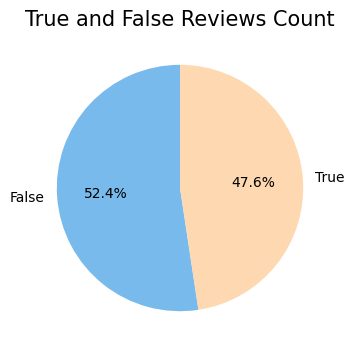

In [169]:
colors = ['#79BAEC','#FED8B1']
plt.figure(figsize=(4,4))
label = df['verified_purchase'].value_counts()
plt.pie(label.values,colors = colors, labels=label.index, autopct= '%1.1f%%', startangle=90)
plt.title('True and False Reviews Count', fontsize=15)
plt.show()

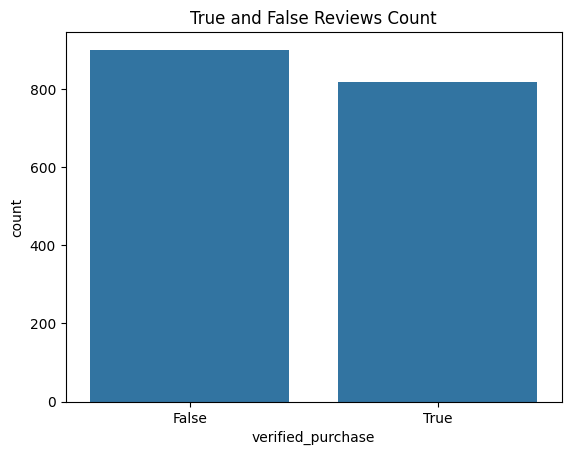

In [170]:
sns.countplot(x ='verified_purchase', 
              data = df).set_title("True and False Reviews Count")
plt.show()

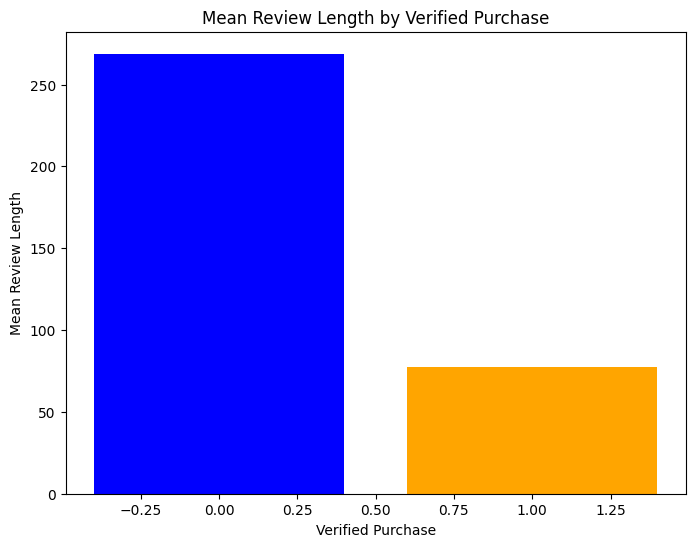

In [171]:

df['review_length'] = df['review_text'].str.len()

mean_lengths = df.groupby('verified_purchase')['review_length'].mean().reset_index()

# Step 3: Plot the data
plt.figure(figsize=(8, 6))
plt.bar(mean_lengths['verified_purchase'], mean_lengths['review_length'], color=['blue', 'orange'])
plt.xlabel('Verified Purchase')
plt.ylabel('Mean Review Length')
plt.title('Mean Review Length by Verified Purchase')
plt.show()


In [172]:
df.head(1)

,review_date,review_rating,review_title,review_text,verified_purchase,total words,total_character,total_stopwords,total punctuations,total_uppercases,review_length,total_words,total_punctuations
0,2019-01-01,5,Dove Men’s + Deodorant,"As you get older, you know what you like and w...",True,39,202,0,7,5,202,39,7


## preprocessing

Text preprocessing is a technique for cleaning text data and preparing it for use in a model. Text data comprises noise in the form of emotions, punctuation, and text in a different case, among other things

In [180]:
# drop unwanted column
df=df.drop(['review_date','total_words','total_character','total_stopwords','total_punctuations','total_uppercases','review_length'],axis=1)
df=df.drop(['total words','total punctuations'],axis=1)



In [182]:
df

,review_rating,review_title,review_text,verified_purchase
0,5,Dove Men’s + Deodorant,"As you get older, you know what you like and w...",True
1,5,Great for a marmite lover!,Three gigantic marmite jars that will last pro...,True
2,4,Vitamin B12.,Excellent,True
3,5,A Very Handy Flavour Top - Up to Keep In The C...,A great flavour top - up for slow cooking.,True
4,5,Very handy,Does what is says it does,False
...,...,...,...,...
1713,5,perfect,"These are amazing, just like the original Corn...",False
1714,5,delicious,Our whole family loves bovril and we use it da...,False
1715,1,This review is for the squeezy bottle,Contents of this bottle is lovely. HOWEVER try...,False
1716,4,very nice,These taste great and you cannot Cant tell the...,False


Text Pre-Processing
The review_text is going to be cleaned and standardized so that when implemented within the model, the model can be optimized at its best. This step takes the longest since it is in base of trial and error.

DONE IN THIS STAGE:

Spelling is corrected
tokenization,
removing stopwords, punctuations, special charas
lowercasing
stemming
removing top 3 common and rare words

In [187]:
#CORRECT SPELLING
from textblob import TextBlob
df['review_text'].apply(lambda i: str(TextBlob(i).correct()))



#This line imports the TextBlob class from the textblob library. TextBlob is used for processing textual data, including spelling correction.
#

0       Is you get older, you know what you like and w...
1       Three gigantic marie wars that will last proba...
2                                               Excellent
3              A great flavour top - up for slow cooking.
4                               Does what is says it does
                              ...                        
1713    These are amazing, just like the original Corn...
1714    Our whole family loves boris and we use it dai...
1715    Contents of this bottle is lovely. HOWEVER try...
1716    These taste great and you cannot Want tell the...
1717    Really pleased to have began Cornettos at last...
Name: corrected_review_text, Length: 1718, dtype: object

In [197]:
# Text preprocessing function
def text_preprocessing(text):
    # Remove special characters and numbers
    removed_special_characters = re.sub("[^a-zA-Z]", " ", str(text))
    
    # Convert to lowercase and split into tokens
    tokens = removed_special_characters.lower().split()
    
    cleaned = []
    stemmed = []
    
    # Remove stopwords
    stemmer = PorterStemmer()
    for token in tokens:
        if token not in sw:
            cleaned.append(token)
    
    # Apply stemming
    for token in cleaned:
        token = stemmer.stem(token)
        stemmed.append(token)

    # Join tokens back into a single string
    return " ".join(stemmed)

In [198]:
df['review_text'] = df['review_text'].apply(text_preprocessing)

In [199]:
df['review_text'].head()

0    as you get older you know what you like what i...
1    three gigant marmit jar that will last probabl...
2                                                excel
3                       great flavour up for slow cook
4                               doe what is say it doe
Name: review_text, dtype: object

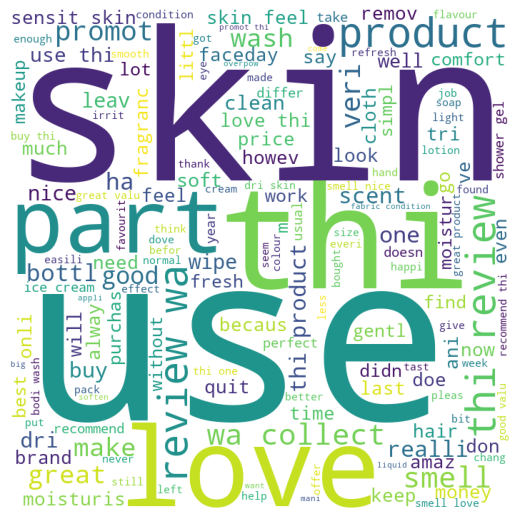

In [202]:
#CHECK TOP COMMON WORDS
from wordcloud import WordCloud
words = '' #words is an empty string that will accumulate all words from the review texts.
for i in df["review_text"]: 
    tokens = i.split()   
    words += " ".join(tokens)+" "
# This loop iterates through each review text (i) in the df["review_text"] column.
# i.split() splits each review text into a list of words (tokens).
# " ".join(tokens) joins the list of words back into a single string separated by spaces.
# words += " ".join(tokens) + " " appends the joined string of words to the words string, adding all review texts together into one long string.

    
word_cloud = WordCloud(width = 700, height = 700, 
                       background_color ='white', 
                       min_font_size = 10).generate(words) 

# WordCloud is initialized with parameters:

# width and height set the dimensions of the word cloud visualization.
# background_color sets the background color of the word cloud to white.
# min_font_size sets the minimum font size of words in the cloud.
# .generate(words) generates the word cloud using the accumulated words string.


plt.figure(figsize = (5, 5)) # creates a figure with a size of 5x5 inches for plotting.
plt.imshow(word_cloud) #  displays the generated word cloud.
plt.axis("off") #  turns off the axis labels and ticks.
plt.tight_layout(pad = 0) # adjusts the padding of the plot for a tighter layout.
  
plt.show()

In [204]:
#removing common and rare words
common = pd.Series(' '.join(df['review_text']).split()).value_counts()[:3]
common = list(common.index)
df['review_text'] = df['review_text'].apply(lambda i: " ".join(i for i in i.split() if i not in common))

rare = pd.Series(' '.join(df['review_text']).split()).value_counts()[-3:]
rare = list(rare.index)
df['review_text'] = df['review_text'].apply(lambda i: " ".join(i for i in i.split() if i not in rare))

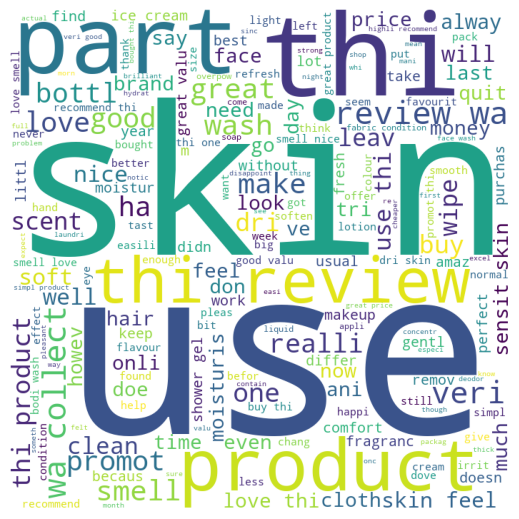

In [205]:
#WORDCLOUD - UPDATED TOP WORDS
words = '' 
for i in df["review_text"]: 
    tokens = i.split()   
    words += " ".join(tokens)+" "

    
word_cloud = WordCloud(width = 700, height = 700, background_color ='white', min_font_size = 10).generate(words) 
plt.figure(figsize = (5, 5)) 
plt.imshow(word_cloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()